In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('../communal/Ames_Housing_Price_Data_cleaned.csv', header = [0])

pd.set_option("display.max_columns", None)

df.head(5)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lot_bucket,mean_LotFrontage
0,1,909176150,856,126000,30,RL,64.9,7890,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,None,None,None,0,3,2010,WD,Normal,"(7298.458, 8298.201]",64.939130
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal,"(3299.486, 4299.229]",46.154930
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal,"(5298.972, 6298.715]",54.060150
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal,"(7298.458, 8298.201]",64.939130
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,None,None,None,0,11,2009,WD,Normal,"(8298.201, 9297.944]",68.724832


In [2]:
numerical_columns = ['GrLivArea', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
                    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                    '2ndFlrSF', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea']

categorical_columns = ['MsSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType',
                      'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                      'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                      'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                      'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
                      'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
                      'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
                      'SaleCondition']

KeyboardInterrupt: 

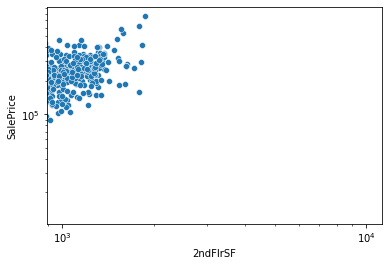

In [3]:
for el in numerical_columns:
    x_y = sns.scatterplot(data = df, x = el, y = 'SalePrice')
    plt.savefig('numerical/x_y/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()
    
    x_logy = sns.scatterplot(data = df, x = el, y = 'SalePrice')
    x_logy.set_yscale('log')
    plt.savefig('numerical/x_logy/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()
    
    logx_logy = sns.scatterplot(data = df, x = el, y = 'SalePrice')
    logx_logy.set_xscale('log')
    logx_logy.set_yscale('log')
    plt.savefig('numerical/logx_logy/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()

In [ ]:
for el in categorical_columns:
    try:
        x_y = sns.boxplot(data = df, x = el, y = 'SalePrice')
        plt.savefig('categorical/x_y/{x_axis}.png'.format(x_axis = el), dpi = 300)
        plt.clf()
    except ValueError:
        continue
    try:
        x_logy = sns.boxplot(data = df, x = el, y = 'SalePrice')
        x_logy.set_yscale('log')
        plt.savefig('categorical/x_logy/{x_axis}.png'.format(x_axis = el), dpi = 300)
        plt.clf()
    except ValueError:
        continue

In [12]:
for col in df.columns:
    sns.histplot(data = df, x = col)
    plt.savefig('histograms/{feature}.png'.format(feature = col), dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.boxplot(data = df, x = 'MsSubClass', y = 'SalePrice')

In [ ]:
corr_matrix = df.corr()
pos_corr_saleprice = corr_matrix['SalePrice'].sort_values(ascending = False)[:10]
neg_corr_saleprice = corr_matrix['SalePrice'].sort_values(ascending = True)[:10]
print(pos_corr_saleprice)
print(neg_corr_saleprice)

#sns.heatmap(corr_matrix, annot=True)
#plt.savefig('correlations.png')